# Challenge

#### Import all the libraries that are necessary

In [1]:
# import libraries here
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline


## Preparation

#### Import the `Fitbit2.csv` file and name your dataset `fitbit`

In [2]:
fitbit=pd.read_csv('../data/Fitbit2.csv')

fitbit.head()

,Date,Calorie burned,Steps,Distance,Floors,Minutes Sedentary,Minutes Lightly Active,Minutes Fairly Active,Minutes Very Active,Activity Calories,...,Distance_miles,Days,Days_encoded,Work_or_Weekend,Hours Sleep,Sleep efficiency,Yesterday_sleep,Yesterday_sleep_efficiency,Months,Months_encoded
0,2015-05-08,1934,905,0.65,0,1.355,46,0,0,1680,...,0.403891,Friday,4.0,1,6.400000,92.086331,0.000000,0.000000,May,5
1,2015-05-09,3631,18925,14.11,4,611.000,316,61,60,2248,...,8.767545,Saturday,5.0,0,7.566667,92.464358,6.400000,92.086331,May,5
2,2015-05-10,3204,14228,10.57,1,602.000,226,14,77,1719,...,6.567891,Sunday,6.0,0,6.450000,88.761468,7.566667,92.464358,May,5
3,2015-05-11,2673,6756,5.02,8,749.000,190,23,4,9620,...,3.119282,Monday,0.0,1,5.183333,88.857143,6.450000,88.761468,May,5
4,2015-05-12,2495,502,3.73,1,876.000,171,0,0,7360,...,2.317714,Tuesday,1.0,1,6.783333,82.892057,5.183333,88.857143,May,5


## Coding Session I - 30 minutes

From the Fitbit data, we want to visually understand: 

1. **How the average number of steps change by month. Use the appropriate visualization to show the median steps by month?**
1. **Is Fitbitter more active on weekend or workdays?**

##### All plots must be in the same jupyter notebook cell.

Hints:

- Use `Months_encoded` and `Week_or Weekend` columns
- Use `matplolib.pyplot` object oriented API
- Set your size figure to `12,4`
- Explore `plt.sca`
- Explore `plt.xticks`
- Save your figures

In [3]:
# Driver 1 enter codes here

meansteps_month = fitbit.groupby('Months_encoded')['Steps'].mean().to_frame().reset_index()
meansteps_month

,Months_encoded,Steps
0,1,9892.064516
1,2,8922.866667
2,3,10312.935484
3,4,13079.033333
4,5,10620.096774
5,6,12536.166667
6,7,9193.322581
7,8,11584.774194
8,9,9191.333333
9,10,8272.451613


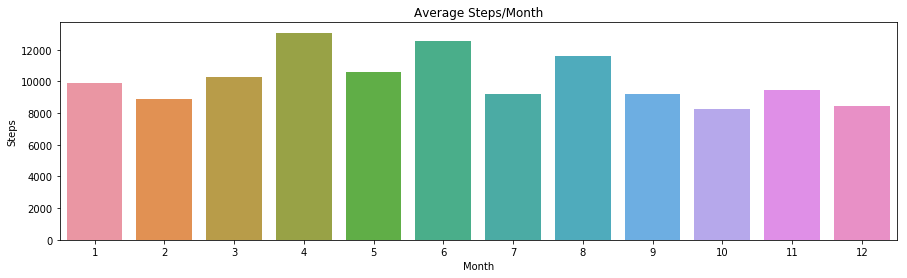

In [4]:
plt.figure(figsize=(15,4))
bp = sns.barplot(data=meansteps_month, x='Months_encoded', y='Steps')
bp.set_xlabel('Month')
bp.set_title('Average Steps/Month')
plt.savefig('avg_steps_month.png')

In [5]:
active_ornot = fitbit.groupby('Work_or_Weekend').mean().reset_index()
active_ornot.columns 

cols = ['Work_or_Weekend', 
       'Minutes Sedentary', 'Minutes Lightly Active', 'Minutes Fairly Active',
       'Minutes Very Active']

active_ornot = pd.DataFrame(active_ornot, columns = cols)
 
active_ornot['Minutes Active Total'] = active_ornot['Minutes Lightly Active'] + active_ornot['Minutes Fairly Active'] + active_ornot['Minutes Very Active']
active_ornot.head()

,Work_or_Weekend,Minutes Sedentary,Minutes Lightly Active,Minutes Fairly Active,Minutes Very Active,Minutes Active Total
0,0,530.831171,263.419048,22.628571,30.638095,316.685714
1,1,577.201076,225.580153,27.580153,37.759542,290.919847


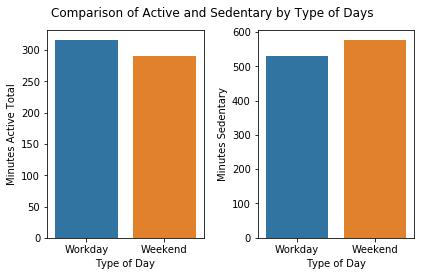

In [6]:
fig, axs = plt.subplots(1,2,figsize=(6,4))

sns.barplot(data=active_ornot, x='Work_or_Weekend', y='Minutes Active Total', ax=axs[0] )
sns.barplot(data=active_ornot, x='Work_or_Weekend', y='Minutes Sedentary', ax=axs[1] )
fig.suptitle("Comparison of Active and Sedentary by Type of Days")

fig.tight_layout(rect=[0, 0.03, 1, 0.95])

axs[0].set_xticklabels(['Workday', 'Weekend'])
axs[1].set_xticklabels(['Workday', 'Weekend'])

axs[0].set_xlabel('Type of Day')
axs[1].set_xlabel('Type of Day')

plt.savefig('comparison_active_sedentary.png');



## Coding Session II - 30 minutes

**Write a loop to plot 3 scatter plots of the following features:**

1. **`Minutes Lightly Active`  vs `Steps`**
1. **`Minutes Very Active` vs `Steps`**
1. **`Minutes Sedentary` vs `Steps`**

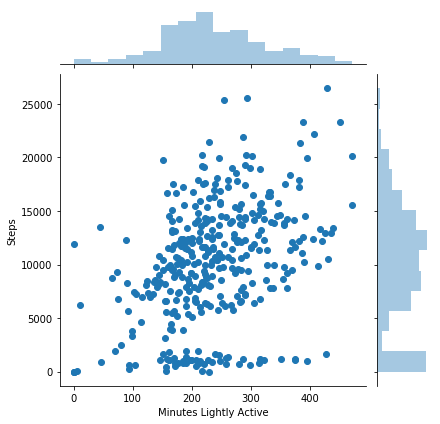

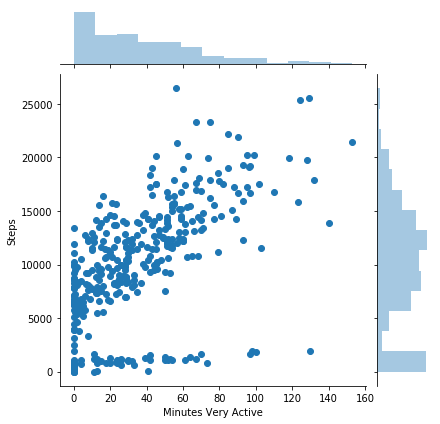

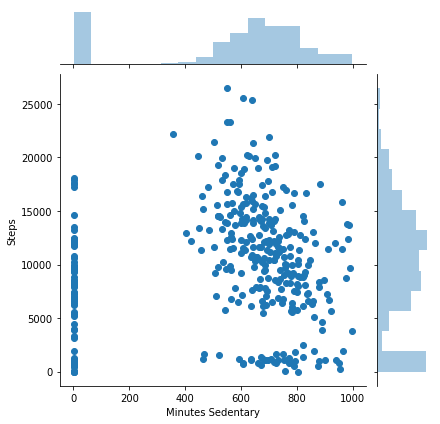

In [7]:
# Driver 2 enter codes here
ls = ['Minutes Lightly Active', 'Minutes Very Active', 'Minutes Sedentary']


for i in ls:
    sns.jointplot(data=fitbit, x=i, y='Steps')
    plt.savefig('scatterplots_'+ i +'.png')
